## Period Prediction
This notebook performs period prediction. The first section focuses on hyperparameter tuning, which can be skipped if desired. 

The second section is about the period prediction.

In [1]:
import copy

from statsmodels.datasets import co2
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
from statsmodels.tsa.seasonal import STL
import numpy as np


import matplotlib.font_manager as fm
import seaborn as sns
import os

os.environ['OMP_NUM_THREADS'] = '4'

In [2]:
from data1.serialize import SerializerSettings
from data1.small_context import get_datasets, get_memorization_datasets

from models.utils import grid_iter
from models.promptcast import get_promptcast_predictions_data
from models.darts import get_arima_predictions_data
from models.validation_likelihood_tuning import get_autotuned_predictions_data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from models import llmtime
from models.llmtime import get_llmtime_predictions_data

In [3]:
import pathlib
import textwrap
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

### Preparation

In [ ]:
# 模型设定
gemini_hypers = {
    # temp=[0.2, 0.4, 0.6, 0.8, 1.0],
    'temp': 0.2,
    'alpha': 0.95,
    'beta': 0.3,
    'basic': [False],
    'settings': [SerializerSettings(base=10, prec=3, signed=True,half_bin_correction=True)],
}

model_hypers = {
    'gemini-1.0-pro': {'model': 'gemini-1.0-pro', **gemini_hypers},
    # 'gemini-pro': {'model': 'gemini-pro', **gemini_hypers}
}

model_predict_fns = {
    'gemini-1.0-pro': get_llmtime_predictions_data,
    # 'gemini-pro': get_llmtime_predictions_data
}

In [ ]:
model_names = list(model_predict_fns.keys())
datasets = get_datasets() 
datasets_tmp = get_memorization_datasets()
datasets.update(datasets_tmp)

### Hyperparameter tuning
You can skip this part and proceed directly to the period prediction section. The recommended temperature range" [0.2, 0.4], prec=3
- Search over temperature and precision 
- Use MSE as the evaluation metric to identify the best configuration.

In [ ]:
# without blanket

out_gemini_pro = {}  # gemini-pro
out_gemini_pro_number = {}  # gemini-1.s0-pro

train, test = datasets['WineDataset']
for model in model_names: 
    model_hypers[model].update({'dataset_name': 'WineDataset'}) 
    hypers = list(grid_iter(model_hypers[model])) 
    num_samples = 10 
    
    pred_dict = get_autotuned_predictions_data(train, test, hypers, num_samples, model_predict_fns[model], verbose=False, parallel=False, whether_blanket=False) 
    if model == 'gemini-pro':
        out_gemini_pro.update({'WineDataset': pred_dict})
    if model == 'gemini-1.0-pro':
        out_gemini_pro_number.update({'WineDataset': pred_dict})

Sampling with best hyper... defaultdict(<class 'dict'>, {'model': 'gemini-1.0-pro', 'temp': 0.2, 'alpha': 0.95, 'beta': 0.3, 'basic': False, 'settings': SerializerSettings(base=10, prec=3, signed=True, fixed_length=False, max_val=10000000.0, time_sep=' ,', bit_sep=' ', plus_sign='', minus_sign=' -', half_bin_correction=True, decimal_point='', missing_str=' Nan'), 'dataset_name': 'WineDataset'}) 
 with NLL inf



  0%|          | 0/1 [00:00<?, ?it/s]

294,352,471,387,399,442,575,606,512,564,716,823,290,397,471,520,452,547,681,789,505,552,738,831,359,394,490,600,558,546,709,741,618,596,796,883,358,472,596,534,674,610,670,869,633,584,822,991,382,546,677,551,720,586,754,1029,586,656,833,1059,414,537,706,557,762,668,647,957,617,777,961,1099,469,532,697,633,637,706,859,999,713,694,908,1154,519,449,585,771,636,615,947,647,717,795,953,1204,489,581,600,745,613,637,989,670,597,800,938,992,361,511,606,672,534,481,797,670,621,723,877,1146,277,381,668,930,559,554,746,668,667,662,926,1018,327,548,514,454,546,609,832,716,
You are a helpful assistant that performs time series predictions. The user will provide a sequence and you will predict the remaining sequence for 431.99999999999994 steps. The sequence is represented by decimal strings separated by commas, and each step consists of contents between two decimals.Please continue the following sequence without producing any additional text. Do not say anything like 'the next terms in the sequence


100%|██████████| 1/1 [04:13<00:00, 253.15s/it]

['6 5 0 , 6 4 8 , 9 5 4 , 1 0 3 1 , 4 2 5 , 5 5 8 , 6 1 4 , 7 0 6 , 6 3 9 , 6 4 4 , 9 4 1 , 1 0 4 6 , 3 7 4 , 5 3 7 , 5 9 2 , 5 0 6 , 5 5 9 , 6 2 2 , 8 5 5 , 7 3 2 , 6 4 9 , 6 5 6 , 9 6 2 , 1 0 6 9 , 4 4 0 , 5 6 3 , 6 2 9 , 6 9 1 , 6 4 4 , 6 5 1 , 9 5 8 , 1 0 6 3 , 4 0 1 , 5 4 4 , 6 0 9 , 6 7 9 , 6 4 2 , 6 4 9 , 9 5 6 , 1 0 6 1 , 4 1 8 , 5 5 1 , 6 1 6 , 6 8 6 , 6 4 3 , 6 5 0 , 9 5 7 , 1 0 6 2 , 4 2 5 , 5 5 8 , 6 2 3 , 6 9 3 , 6 4 6 , 6 5 3 , 9 6 0 , 1 0 6 5 , 4 3 2 , 5 6 5 , 6 3 0 , 6 9 9 , 6 5 2 , 6 5 9 , 9 6 6 , 1 0 7 1 , 4 4 7 , 5 7 2 , 6 3 7 , 7 0 4 , 6 5 7 , 6 6 4 , 9 7 1 , 1 0 7 6 , 4 6 2 , 5 7 9 , 6 4 4 , 7 1 1 , 6 6 4 , 6 7 1 , 9 7 8 , 1 0 8 3 , 4 7 7 , 5 8 6 , 6 5 1 , 7 1 8 , 6 7 1 , 6 7 8 , 9 8 5 , 1 0 9 0 , 4 9 2 , 5 9 3 , 6 5 8 , 7 2 5 , 6 7 8 , 6 8 5 , 9 9 2 , 1 0 9 7 , 5 0 7 , 6 0 0 , 6 6 5 , 7 3 2 , 6 8 5 , 6 9 2 , 9 9 9 , 1 1 0 4 , 5 2 2 , 6 0 7 , 6 7 2 , 7 3 9 , 6 9 2 , 6 9 9 , 1 0 0 6 , 1 1 1 1 , 5 3 7 , 6 1 4 , 6 7 9 , 7 4 6 , 6 9 9 , 7 0 6 , 1 0 1 3 , 1 1 1 8 , 5 5 

In [ ]:
out_without_blanket_2 = out_gemini_pro_number 

In [4]:
def plot_preds(train, test, pred_dict, model_name, ds_name, show_samples=False):
    pred = pred_dict['median']
    pred = pd.Series(pred, index=test.index)
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(train)
    plt.plot(test, label='Truth', color='black')
    plt.plot(pred, label=model_name, color='purple')
    # shade 90% confidence interval
    samples = pred_dict['samples']
    lower = np.quantile(samples, 0.05, axis=0)
    upper = np.quantile(samples, 0.95, axis=0)
    plt.fill_between(pred.index, lower, upper, alpha=0.3, color='purple')
    if show_samples:
        samples = pred_dict['samples']
        # convert df to numpy array
        samples = samples.values if isinstance(samples, pd.DataFrame) else samples
        for i in range(min(10, samples.shape[0])):
            plt.plot(pred.index, samples[i], color='purple', alpha=0.3, linewidth=1)
    plt.legend(loc='upper left')
    if 'NLL/D' in pred_dict:
        nll = pred_dict['NLL/D']
        if nll is not None:
            plt.text(0.03, 0.85, f'NLL/D: {nll:.2f}', transform=plt.gca().transAxes,
                     bbox=dict(facecolor='white', alpha=0.5))
    plt.show()
    plt.savefig(f'{ds_name}_{model_name}_prediction.pdf', format='pdf')


def plot_preds2(train, test, pred_dict, model_name, ds_name, show_samples=False):
    pred = pred_dict['median']
    pred = pd.Series(pred, index=test.index)
    plt.figure(figsize=(8, 6), dpi=100)
    # plt.plot(train)
    plt.plot(test, label='Truth', color='black')
    plt.plot(pred, label=model_name, color='purple')
    # shade 90% confidence interval
    samples = pred_dict['samples']
    lower = np.quantile(samples, 0.05, axis=0)
    upper = np.quantile(samples, 0.95, axis=0)
    plt.fill_between(pred.index, lower, upper, alpha=0.3, color='purple')
    if show_samples:
        samples = pred_dict['samples']
        # convert df to numpy array
        samples = samples.values if isinstance(samples, pd.DataFrame) else samples
        for i in range(min(10, samples.shape[0])):
            plt.plot(pred.index, samples[i], color='purple', alpha=0.3, linewidth=1)
    plt.legend(loc='upper left')
    if 'NLL/D' in pred_dict:
        nll = pred_dict['NLL/D']
        if nll is not None:
            plt.text(0.03, 0.85, f'NLL/D: {nll:.2f}', transform=plt.gca().transAxes,
                     bbox=dict(facecolor='white', alpha=0.5))
    plt.savefig(f'{ds_name}{model_name}_prediction_meticulous.pdf', format='pdf')

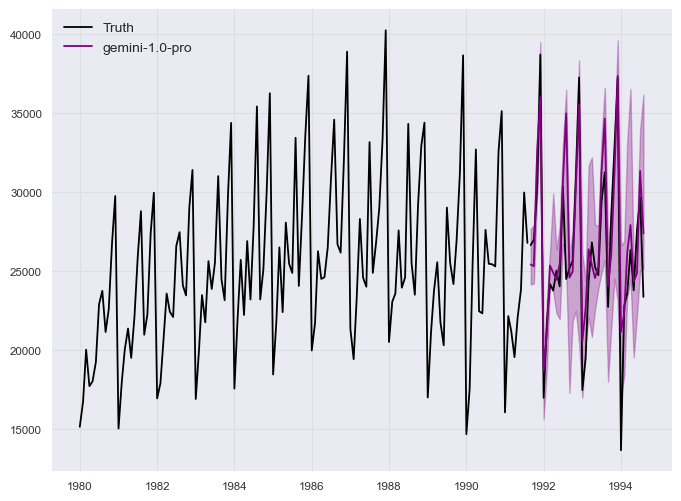

<Figure size 640x480 with 0 Axes>

In [33]:
plot_preds(train, test, out_without_blanket_2['WineDataset'], model_name='gemini-1.0-pro', ds_name='WineDataset', show_samples=False)

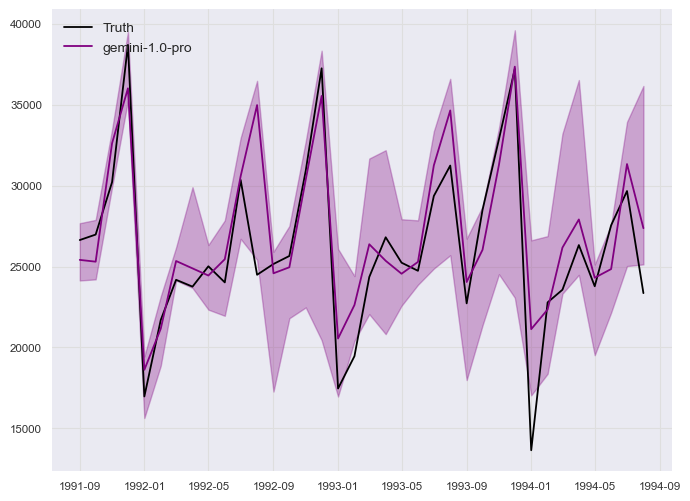

In [34]:
plot_preds2(train, test, out_without_blanket_2['WineDataset'], model_name='gemini-1.0-pro', ds_name='WineDataset', show_samples=False)

### Compute the results

In [5]:
import os

from utils_paragraph import paraphrase_nlp, paraphrasing_predict_llm, paraphrase_initial, \
    paraphrase_seq2lan, recover_lan2seq, paraphrasing_predict_llama

os.environ['OMP_NUM_THREADS'] = '4'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openai

from data1.serialize import SerializerSettings
from sklearn import metrics
from models.darts import get_arima_predictions_data
from models.llmtime import get_llmtime_predictions_data
from data1.small_context import get_datasets, get_memorization_datasets, get_dataset
from models.validation_likelihood_tuning import get_autotuned_predictions_data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
def metrics_used(datasets, dataset_name, originial_pred, num_samples=10):
    '''
    Calculate the metrics for the given dataset and predictions.
    Args:
        dataset_name: 
        originial_pred: 
        num_samples: 
    Returns:

    '''
    print("dataset_name: ", dataset_name)
    
    mse_amount = 0.0
    mae_amount = 0.0
    mape_amount = 0.0
    rsquare_amount = 0.0
    _, test = datasets[dataset_name]
    for i in range(num_samples):
        seq_pred = originial_pred[dataset_name]['samples'].iloc[i, :]
    
        mse = mean_squared_error(test, seq_pred)
        mae = mean_absolute_error(test, seq_pred)
        mape = metrics.mean_absolute_percentage_error(test, seq_pred)*100
        r2 = r2_score(test, seq_pred)
    
        mse_amount += mse
        mae_amount += mae
        mape_amount += mape
        rsquare_amount += r2
    
    mse_mean = mse_amount/num_samples
    mae_mean = mae_amount/num_samples
    mape_mean = mape_amount/num_samples
    r2_mean = rsquare_amount/num_samples
    
    # print and plot values
    print("\n")
    print(f'MSE: {mse_mean}, MAE: {mae_mean}, MAPE: {mape_mean}, R²: {r2_mean}')
    print("\n")
    
    return mse_mean, mae_mean, mape_mean, r2_mean

In [ ]:
dataset_name = 'WineDataset'
num_samples = 10
metrics_used(datasets=datasets, dataset_name=dataset_name, num_samples=num_samples, originial_pred=out_without_blanket_2)

### Hyperparameter tuning (through Grid Search)

In [ ]:
model_predict_fns = {
    'gemini-1.0-pro': get_llmtime_predictions_data, 
    # 'gemini-pro': get_llmtime_predictions_data
}
model_names = list(model_predict_fns.keys())

In [ ]:
# `model_predict_fns` and `model_names` represent the set of models used. These are referenced within the function, 
# but are defined externally.

def prediction_gemini(model_predict_fns, train, test, model_hypers, num_samples=10, whether_blanket=False, dataset_name='WineDataset'):
    model_names = list(model_predict_fns.keys())
    out_gemini_pro = {}  # gemini-pro
    out_gemini_pro_number = {}  # gemini-1.0-pro
    for model in model_names: 
        model_hypers[model].update({'dataset_name': dataset_name})  
        hypers = list(grid_iter(model_hypers[model])) 
        
        pred_dict = get_autotuned_predictions_data(train, test, hypers, num_samples, model_predict_fns[model], verbose=False, parallel=False, whether_blanket=whether_blanket) 
        if model == 'gemini-pro':
            out_gemini_pro.update({dataset_name: pred_dict})
        if model == 'gemini-1.0-pro':
            out_gemini_pro_number.update({dataset_name: pred_dict})
    return out_gemini_pro, out_gemini_pro_number

In [ ]:
import copy
import time

# Grid Search
temp = [0.2, 0.4, 0.6, 0.8, 1.0]
prec = [2, 3]

gemini_hypers_list = [{f'temp': temp_val} for i, temp_val in zip(range(5), temp)]
gemini_hypers_list_tmp = copy.deepcopy(gemini_hypers_list)

for dict in gemini_hypers_list:
    dict.update({
    'alpha': 0.95,
    'beta': 0.3,
    'basic': [False],
    'settings': [SerializerSettings(base=10, prec=2, signed=True,half_bin_correction=True)],
})
for dict in gemini_hypers_list_tmp:
    dict.update({
    'alpha': 0.95,
    'beta': 0.3,
    'basic': [False],
    'settings': [SerializerSettings(base=10, prec=3, signed=True,half_bin_correction=True)],
})
gemini_hypers_list.extend(gemini_hypers_list_tmp)

datasets = get_datasets()  # test_frac=0.4
datasets_tmp = get_memorization_datasets()  # test_frac=0.4
datasets.update(datasets_tmp)
train, test = datasets['WineDataset']  # For WineDataset

output_metrics = []

for index, dict in enumerate(gemini_hypers_list):
    if index > 0:
        time.sleep(60)
    model_hypers = {
    'gemini-1.0-pro': {'model': 'gemini-1.0-pro', **dict},
    # 'gemini-pro': {'model': 'gemini-pro', **dict}
}
    out_gemini_pro, out_gemini_pro_number = prediction_gemini(train, test, model_hypers, num_samples=10, whether_blanket=False)
    mse_mean, mae_mean, mape_mean, r2_mean = metrics_used(datasets=datasets, dataset_name=dataset_name, num_samples=num_samples, originial_pred=out_gemini_pro_number)
    dict.update({'mse': mse_mean, 'mae': mae_mean, 'mape': mape_mean, 'r2': r2_mean})
    output_metrics.append(dict)


In [ ]:
mape_list = []
r2_list = []
for dict in output_metrics:
    mape_list.append(dict['mape'])
    r2_list.append(dict['r2'])

def find_minimum_index(lst):
    min_value = min(lst)
    min_index = lst.index(min_value)
    return min_index

def find_maximum_index(lst):
    max_value = max(lst)
    max_index = lst.index(max_value)
    return max_index

argmin_mape = find_minimum_index(mape_list)
argmin_r2 = find_maximum_index(r2_list)

gemini_hypers_list[argmin_mape]

{'temp': 0.4,
 'alpha': 0.95,
 'beta': 0.3,
 'basic': [False],
 'settings': [SerializerSettings(base=10, prec=3, signed=True, fixed_length=False, max_val=10000000.0, time_sep=' ,', bit_sep=' ', plus_sign='', minus_sign=' -', half_bin_correction=True, decimal_point='', missing_str=' Nan')],
 'mse': 24100678.72906979,
 'mae': 3431.5938069444433,
 'mape': 13.889227990410399,
 'r2': 0.14125148298635942}

In [ ]:
print(gemini_hypers_list[argmin_mape], gemini_hypers_list[argmin_r2])
# Recommended temperature range: [0.2, 0.4]

{'temp': 0.4, 'alpha': 0.95, 'beta': 0.3, 'basic': [False], 'settings': [SerializerSettings(base=10, prec=3, signed=True, fixed_length=False, max_val=10000000.0, time_sep=' ,', bit_sep=' ', plus_sign='', minus_sign=' -', half_bin_correction=True, decimal_point='', missing_str=' Nan')], 'mse': 24100678.72906979, 'mae': 3431.5938069444433, 'mape': 13.889227990410399, 'r2': 0.14125148298635942} {'temp': 0.4, 'alpha': 0.95, 'beta': 0.3, 'basic': [False], 'settings': [SerializerSettings(base=10, prec=3, signed=True, fixed_length=False, max_val=10000000.0, time_sep=' ,', bit_sep=' ', plus_sign='', minus_sign=' -', half_bin_correction=True, decimal_point='', missing_str=' Nan')], 'mse': 24100678.72906979, 'mae': 3431.5938069444433, 'mape': 13.889227990410399, 'r2': 0.14125148298635942}


### Predict the Period

#### Preparation

In [ ]:
# We use double_period as the upper bound for the maximum prediction horizon, since \( n \times \text{periods} \) still corresponds to a valid temporal cycle in the time series data. For convenience, we adopt double_period as this upper bound.

double_period = 14
message = ("You are a helpful assistant that specializing in time series analysis. The user will provide a sequence. The sequence is represented by decimal strings separated by commas. You need to infer the most probable underlying cycle of the sequence, even though there may also be a trend in this sequence. Do not assume that the underlying cycle has to stick to the popular cycles like 7 (days in a week), 12 (months in a year) and 30 (days in a month), just infer the cycle fully based on the inherent cycle of the given sequence. The underlying cycle of the sequence is strictly below {double_period}. Please infer the cycle without producing any additional text. Do not say anything like 'the underlying cycle is', just return the number. Sequence:\n")

In [ ]:
# block the safety modules for gemini-1.0-pro

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE"
  },
]

#### Period Prediction

Manually input the dataset you wish to test on.

In [ ]:
# Ausbeer: period = 4
# input_str = ',402,249,279,453,354,281,298,479,376,292,300,464,352,279,328,466,406,279,350,460,425,292,343,520,391,328,371,535,423,339,389,572,464,378,436,587,503,410,449,621,511,410,453,655,550,470,490,662,636,477,494,742,615,505,567,750,623,559,595,793,673,587,606,838,692,604,636,879,776,623,709,1006,791,748,759,987,866,763,726,983,888,722,765,970,836,765,774,1008,899,789,718,1056,873,744,754,985,894,709,808,922,970,737,800,1028,851,722,823,1030,813,662,726,942,765,716,688,978,789,688,701,983,778,711,714,940,825,686,737,948,810,737,752,1077,795,735,750,1011,834,739,714,1079,789,703,729,1026,744,673,694,935,722,696,673,892,757,610,701,933,707,668,686,909,671,647,647,881,720,647,664,922,'

# Wine: period = 12
# input_str = ',294,352,471,387,399,442,575,606,512,564,716,823,290,397,471,520,452,547,681,789,505,552,738,831,359,394,490,600,558,546,709,741,618,596,796,883,358,472,596,534,674,610,670,869,633,584,822,991,382,546,677,551,720,586,754,1029,586,656,833,1059,414,537,706,557,762,668,647,957,617,777,961,1099,469,532,697,633,637,706,859,999,713,694,908,1154,519,449,585,771,636,615,947,647,717,795,953,1204,489,581,600,745,613,637,989,670,597,800,938,992,361,511,606,672,534,481,797,670,621,723,877,1146,277,381,668,930,559,554,746,668,667,662,926,1018,327,548,514,454,546,609,832,716,'

# TurkeyPower: period = 7
input_str = ',624,870,883,878,862,889,773,653,945,958,1000,999,918,805,657,936,1026,979,956,986,888,731,855,844,809,839,840,815,709,934,961,933,954,910,699,571,860,946,921,867,768,646,576,873,822,792,802,840,681,528,776,823,813,912,885,711,606,888,915,950,890,836,730,604,862,865,879,883,849,736,608,876,840,877,902,907,773,609,878,885,875,836,780,672,453,712,762,690,732,657,565,451,696,744,689,768,706,585,460,804,755,734,719,705,627,607,783,810,734,745,724,589,512,728,751,744,738,724,621,367,239,295,354,600,615,564,430,699,677,721,700,708,658,524,716,723,720,647,671,597,509,735,744,770,803,815,716,581,845,851,852,860,835,732,579,837,825,809,813,821,703,524,813,832,812,816,809,716,556,839,826,866,879,862,735,565,860,869,866,896,897,776,600,878,887,895,875,547,379,397,446,491,688,708,681,696,631,935,927,930,942,941,831,666,951,1000,999,1007,1014,881,723,1022,1020,1028,1039,1032,902,718,1018,1024,1024,994,991,868,706,936,970,983,1023,1012,878,726,1038,1023,991,958,940,823,671,923,854,973,980,986,834,653,914,858,847,848,849,748,619,861,834,804,816,847,743,579,827,823,803,776,736,633,461,724,760,781,800,814,671,546,758,765,753,753,765,658,476,718,713,745,724,738,647,513,740,732,722,728,698,584,458,685,680,705,717,607,499,441,713,693,703,706,707,596,491,766,748,743,729,728,613,468,740,749,780,788,787,640,540,769,741,769,801,830,701,562,836,823,823,808'

# if model in ['gemini-1.0-pro', 'gemini-pro']:
model = 'gemini-pro'
content_fin = []
# print(gemini_sys_message+extra_input+input_str)
model = genai.GenerativeModel(model)
num_samples = 20

for i in range(num_samples):
    print("Index:", i)
    response = model.generate_content(
        contents=message+input_str, 
        generation_config=genai.types.GenerationConfig(
            temperature=0.4,
        ),
        safety_settings=safety_settings
    )
    tmp = response.text
    content_fin.append(tmp)
